# Import dataset

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [224]:
df = pd.read_csv('marketing_campaign_data.csv')

# Data Details
Data were uploaded in 2020. sources <a href='https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign'>here</a>.

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntCoke - amount spent on Coke products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [226]:
#Missing values
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [227]:
#Duplicated values
df.duplicated().sum()

0

# EDA

## Feature Engineering

In [228]:
#Create conversion_rate column

df['conversion_rate'] = (df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases'] + df['NumWebPurchases'])/df['NumWebVisitsMonth']
df['conversion_rate'] = df['conversion_rate'].map(lambda x: 0 if x==np.inf else 0 if np.isnan(x)==True else x)


#Create age column
df['age'] = 2020 - df['Year_Birth']

#Create age_group
df['age_group'] = df['age'].map(lambda x: 'Teen' if x<20 else 'Adult' if x<40 else 'Middle Age' if x<60 else 'Elder')

#Create childs columns
df['childs'] = df['Kidhome'] + df['Teenhome']

#Create monetary columns (total pengeluaran)
df['spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#Create total_acc_cmp (total accepted campaign)
df['total_acc_cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

#Convert to Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
data_date = datetime.strptime('01-01-2020','%m-%d-%Y')
df['cutomer_days'] = (data_date - df['Dt_Customer'])
df['cutomer_days'] = df['cutomer_days'].map(lambda x: x.days)

In [229]:
df = df.drop(columns=['Unnamed: 0','ID','Year_Birth','Z_CostContact','Z_Revenue','Kidhome','Teenhome'])

In [230]:
cat = [i for i in df.columns if df[i].nunique() < 10]
num = [i for i in df.columns if (df[i].dtype in ['int64','float64']) & (i not in cat)]
len(cat)

12

## Univariate Analysis

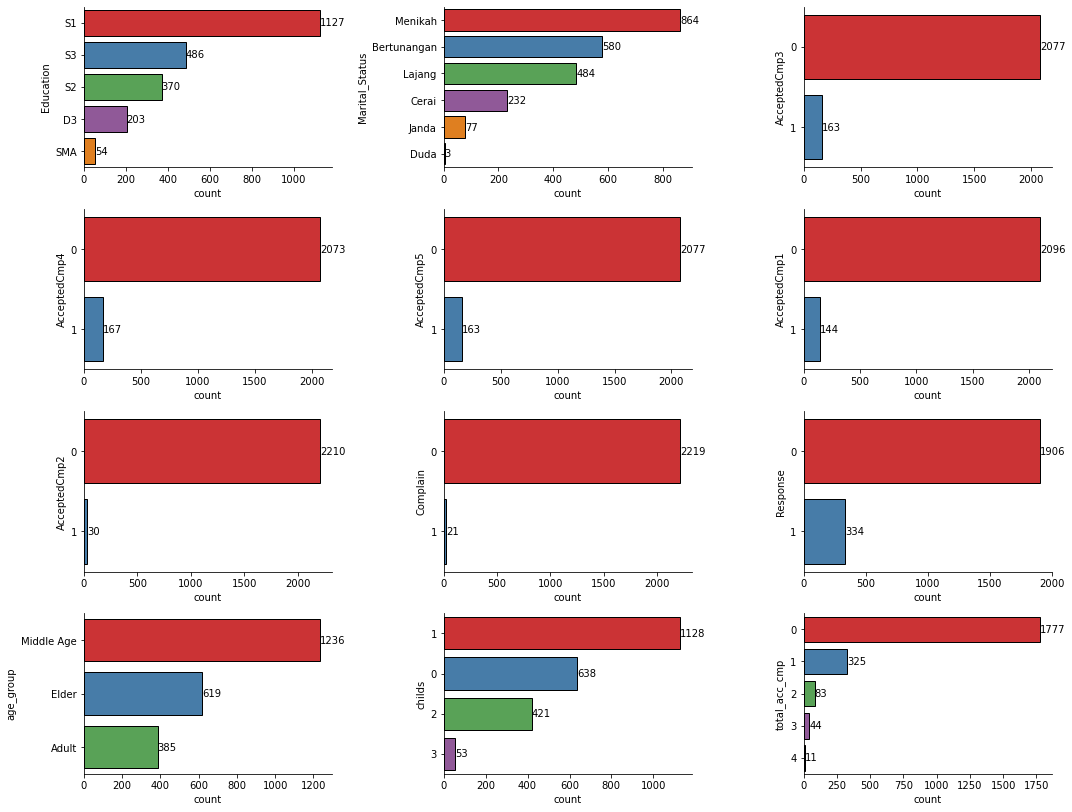

In [244]:
plt.figure(figsize=(15, 25))

for i in range(len(cat)):
    plt.subplot(9, 3, i+1)
    ax = sns.countplot(y=cat[i], data=df, palette='Set1', order=df[cat[i]].value_counts().index,edgecolor='black')
    plt.bar_label(ax.containers[0])

    
sns.despine()
plt.tight_layout()
plt.savefig('univariate.jpg', dpi=400)
plt.show()


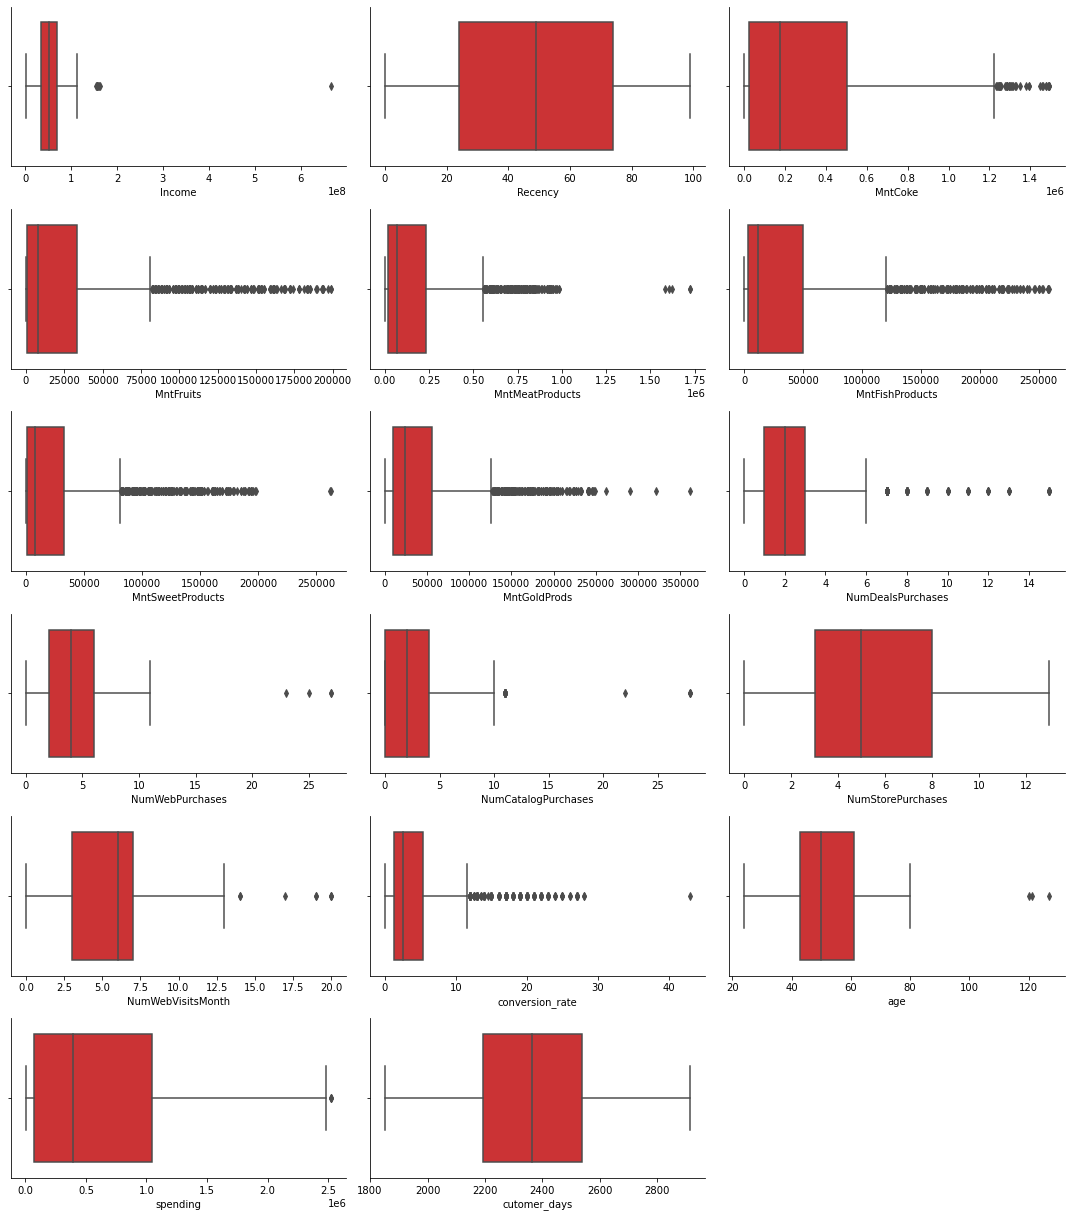

In [245]:
plt.figure(figsize=(15, 25))

for i in range(len(num)):
    plt.subplot(9, 3, i+1)
    ax = sns.boxplot(x=num[i], data=df, palette='Set1')
    

    
sns.despine()
plt.tight_layout()
plt.savefig('univariate_num.jpg', dpi=400)

plt.show()

In [233]:
df['Dt_Customer'].describe()

count                    2240
unique                    663
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

## Multivariate Analysis

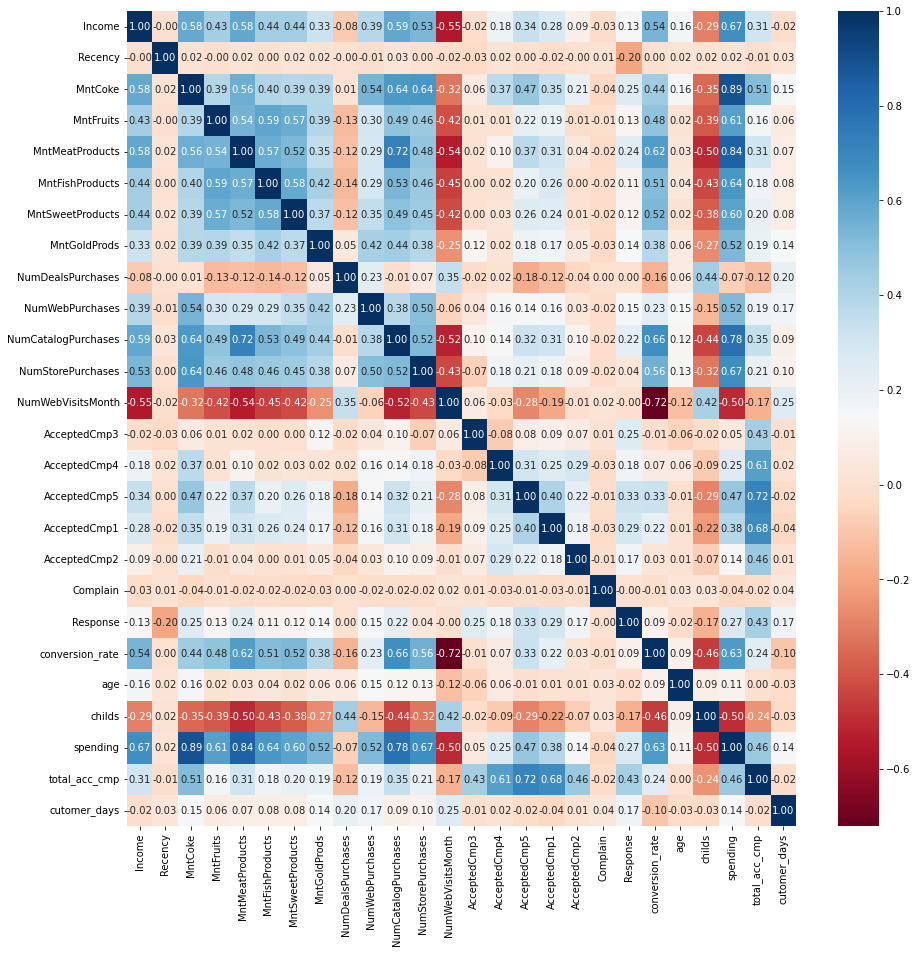

In [234]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt='.2f')
plt.show()

### Converesion Rate

In [252]:
dfg

,age_group,conversion_rate
0,Adult,4.558978
1,Elder,5.364716
2,Middle Age,3.858683


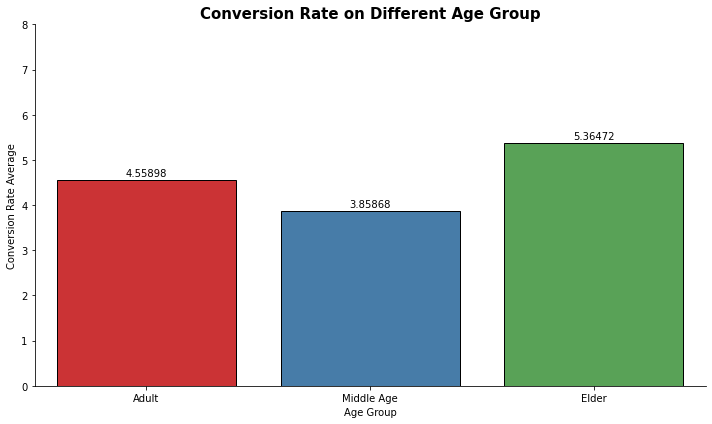

In [256]:
dfg = df.groupby('age_group')['conversion_rate'].mean().reset_index()

fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=dfg,x='age_group',y='conversion_rate',edgecolor='black',palette='Set1',order=['Adult','Middle Age','Elder'])
plt.title('Conversion Rate on Different Age Group', fontsize=15, color='black', weight='bold')
plt.bar_label(ax.containers[0], padding=2)
plt.ylim(0,8)
plt.ylabel('Conversion Rate Average')
plt.xlabel('Age Group')

sns.despine()
plt.tight_layout()
plt.savefig('age_group_bar.jpg', dpi=400)

plt.show()

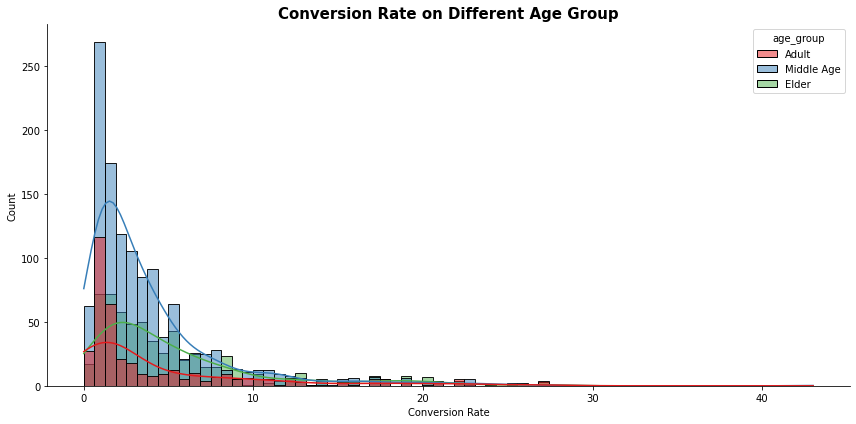

In [257]:
plt.figure(figsize=(12,6))

sns.histplot(data=df,x='conversion_rate',hue='age_group',kde=True,palette='Set1',hue_order=['Adult','Middle Age','Elder'])
plt.title('Conversion Rate on Different Age Group', fontsize=15, color='black', weight='bold')
plt.xlabel('Conversion Rate')

sns.despine()
plt.tight_layout()
plt.savefig('age_group_hist.jpg', dpi=400)
plt.show()

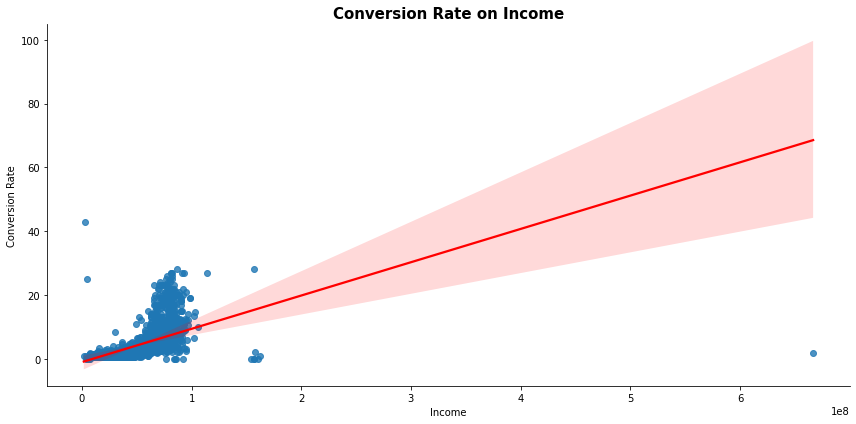

In [259]:
plt.figure(figsize=(12,6))

sns.regplot(data=df,y='conversion_rate',x='Income',line_kws={"color": "red"})

plt.title('Conversion Rate on Income', fontsize=15, color='black', weight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Income')

sns.despine()
plt.tight_layout()
plt.savefig('income.jpg', dpi=400)
plt.show()

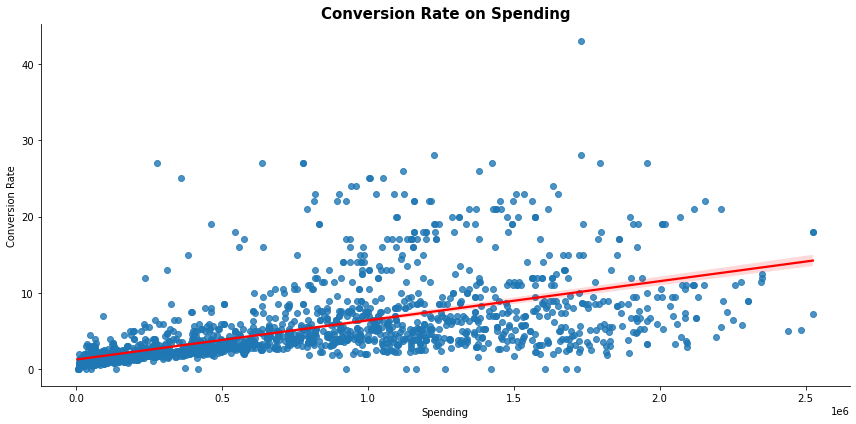

In [260]:
plt.figure(figsize=(12,6))

sns.regplot(data=df,y='conversion_rate',x='spending', line_kws={"color": "red"})

plt.title('Conversion Rate on Spending', fontsize=15, color='black', weight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Spending')

sns.despine()
plt.tight_layout()
plt.savefig('spending.jpg', dpi=400)

plt.show()

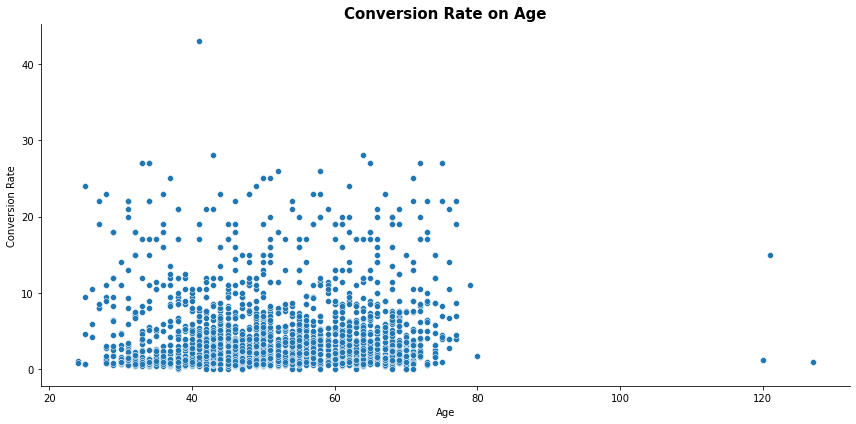

In [248]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=df,y='conversion_rate',x='age')
plt.title('Conversion Rate on Age', fontsize=15, color='black', weight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Age')
sns.despine()
plt.tight_layout()
plt.savefig('age_.jpg', dpi=400)
plt.show()